# Wstęp
## Cel ćwiczenia
W tym notebooku głównym celem jest żeby poprawnie przeprowadzić "standardowe" ML flow i przypomnieć sobie/ popracować z biblotekami sklearn, numpy, pandas.
Zadanie będzie wymagało zrobienia Exploratory Data Analysis, a następnie na jej podstawie wykonania preprocessingu danych oraz puszczenie modelu.

### Ogólne informacje do zadania:
#### 1. Zbiór danych
czyli to na czym będziemy pracowac w tym zadaniu. Jest to zbiór [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing), na którym do wykonania jest zadanie z klasyfikacji tak jak opisane w repozytorium. Polecam skorzystać z `ucimlrepo` aby go zainstalować.



#### 2. EDA

czyli poznaj swoje dane, a przede wszystkim oceń ich jakość. Potraktuj ten etap jako upewnienie się, że to, co wejdzie do Twojego modelu, jest „czyste” i nie zawiera żadnych niespodziewanych wartości w poszczególnych kolumnach  takich, które w najlepszym przypadku zwróciłyby błąd, a w najgorszym doprowadziły do wytrenowania słabego modelu.
Pamiętaj: *Garbage in, garbage out.* Z pustego nawet Salomon nie naleje, nieważne jak bardzo będziemy dobierać hiperparametry.
Poniżej kilka pomocniczych pytań, które mogą naprowadzić, co należy sprawdzić i na co uważać na etapie EDA:

* czy dane załadowały się prawidłowo
* czy typy kolumn odpowiadają ich zawartości; czy potrzebujemy zmienić typ (np. wiek powinien być w `int`, a nie w typie „object”)
* czy mamy brakujące wartości w jakichś kolumnach- jeśli tak, to co z nimi robimy (usuwamy wiersze? kolumny? uzupełniamy brak?); jeśli uzupełniamy, to w jaki sposób, by było to optymalne. Istnieje kilka prostych metod (mediana, moda, średnia), ale w praktyce coraz częściej korzysta się z bardziej zaawansowanych imputerów (KNN Imputer, MICE itp.)
* czy brakująca wartość to zawsze Null/NaN? Czy dataset może używać innych znaczników braków (np. „?”, „missing”, „-999”)?
* czy wartości w kolumnach mają sens (ujemny wiek, BMI równe 0 itp.) i jak je traktować
* jak wyglądają rozkłady wartości kolumn, czy takich rozkładów się spodziewaliśmy
* czy mamy wartości odstające? Jeśli tak, to czy wynikają one z błędów (np. wzrost człowieka 18.0 m, źle wstawiony przecinek), czy mogą być prawdopodobne w prawdziwym świecie (np. miesięczny zarobek 500 tys. zł)? Co zrobić z takimi outlierami? Jak je wykryć (np. IQR, Z-score, Isolation Forest)?
* czy mamy kolumny wysoko skorelowane ze sobą; czy taka korelacja jest dla naszego modelu korzystna czy szkodliwa; jak ją zwizualizować (np. heatmapa); jak ją rozwiązać (np. usunięcie jednej z kolumn, PCA)
* czy format naszych danych jest „model-friendly”? Czy musimy zastosować jakieś kodowanie zmiennych (np. one-hot encoding, target encoding)?
* czy powinniśmy standaryzować / normalizować dane? Kiedy warto zastosować jedno, a kiedy drugie? Czy są przypadki, gdzie nie należy tego robić, a takie, gdzie jest to absolutnie konieczne?
* czy są kolumny, które na pewno usuniemy, bo nic nie wniosą do modelu albo mogą mu szkodzić (np. ID, kolumny z dużą liczbą unikalnych wartości bez znaczenia semantycznego)
* czy między naszymi danymi zachodzi jakaś istotna statystycznie zależność? Jeśli tak, to wykonajmy testy statystyczne, aby to potwierdzić (np. chi-kwadrat dla zmiennych kategorycznych, ANOVA, testy normalności, testy na homogeniczność wariancji)

Oczywiście nie musicie odpowiadać na wszystkie te pytania, bo nie każdy zbiór będzie wymagał rozwiązywania wszystkich problemów. Warto jednak pamiętać, że zbiór danych to fundament- jego zrozumienie może tylko pomóc w zaprojektowaniu dobrego modelu.

#### 3. Modelowanie

czyli należy wykorzystać ładnie przygotowane dane do zbudowania modelu. Wiadomo, że istnieją modele, które często zapewniają wysokie metryki już „z natury”, np. XGBoost. Warto jednak wziąć pod uwagę, że:

* nie ma co strzelać z armaty do komara- nie bierz XGBoosta, jeśli problem sensownie rozwiązuje regresja logistyczna
* im bardziej interpretowalny model, tym lepiej- zarówno przy dalszym rozwijaniu, jak i przy próbie wdrażania go w systemach produkcyjnych
* przy mniejszych zbiorach trenowanie trwa szybko, więc warto przetestować różne typy modeli i różne konfiguracje hiperparametrów
* wyciek wiedzy (*data leakage*) to jedno z największych ryzyk- kluczowe jest upewnienie się, że żadna informacja z przyszłości (np. ze zbioru testowego, albo z kolumn pochodnych) nie trafi do części treningowej
* w większości modeli mamy co najmniej kilka hiperparametrów, które mogą znacząco wpłynąć na jakość predykcji; powinniśmy je przetestować i dobrać tak, by model osiągał jak najlepsze wyniki
* najbezpieczniej jest używać cross-walidacji- i to na niej dobierać hiperparametry
* obliczenie wielu metryk nie zaszkodzi, natomiast musimy jasno zdefiniować, która metryka jest najważniejsza z perspektywy celu zadania (accuracy? recall? precision? AUC? MAE?)




## **KROKI DO WYKONANIA ZADANIA- minimalny zakres prac (EDA + Modelowanie)**

To zadanie jest wyjątkowo otwarte i można je wykonać na wiele sposobów, w zależności od kreatywności i podejścia. Natomiast istnieje **pewne minimum**, na którym na pewno trzeba się skupić, aby zadanie zostało zaliczone


**EDA (Exploratory Data Analysis)**

* sprawdzenie brakujących danych oraz- jeśli będzie potrzeba- ich uzupełnienie odpowiednią metodą
* sprawdzenie wartości odstających i decyzja, co z nimi zrobić (usunąć, poprawić, zostawić)
* sprawdzenie rozkładów **zmiennej decyzyjnej** oraz najważniejszych zmiennych wejściowych
* zbadanie, jak dokładnie zformatować dane, aby model mógł je poprawnie przyjąć (np. typy danych, kodowanie zmiennych, standaryzacja)
* zbadanie zależności między zmiennymi (np. korelacje, testy statystyczne, analiza współzależności)
* zadbanie o warstwę wizualną tam, gdzie jest to możliwe i pomocne (wykresy, heatmapy, histogramy, boxploty itp.)
* krótki wniosek po EDA- co możemy powiedzieć o danych, co w nich odkryliśmy, jakie są istotne problemy i na co należy uważać podczas modelowania


**MODELOWANIE**

* wybranie minimum **3 różnych modeli** reprezentujących różne rodziny (np. regresja logistyczna, drzewa, modele ensemble, SVM, sieć neuronowa)
* dla każdego modelu sprawdzenie minimum **2 hiperparametrów** (dobieranych na zbiorze walidacyjnym)
* dobór hiperparametrów wykonany za pomocą mechanizmu **cross-walidacji**
* sprawdzenie ostatecznych wyników na **zbiorze testowym**, po zakończeniu strojenia hiperparametrów
* użycie techniki SHAP na dowolnym wytrenowanym modelu w celu zbadania wyjaśnialności- wybrać minimum jeden przykład poprawnej predykcji oraz jeden przykład błędnej, a następnie je zbadać.
* czytelna prezentacja wyników i metryk (tabela porównawcza, wykresy, krótki komentarz)
* wnioski i konkluzje z eksperymentu- który model działa najlepiej, dlaczego, jakie są ograniczenia, co można poprawić

**WAŻNE UWAGI DO ZADANIA**

* Pamiętajcie, że analizę zbioru wykonujemy na **całym dostępnym zbiorze danych**. **Natomiast** kiedy przechodzimy do transformacji zbioru danych (standaryzacja, uzupełnianie brakujących danych itp.), wykonujemy ją **wyłącznie na podstawie rozkładu zbioru *trenującego***.
  Przykładowo: parametry używane do standaryzacji kolumn obliczamy na zbiorze trenującym, a następnie stosujemy je do zbioru walidacyjnego i testowego. W przeciwnym przypadku dochodzi do **wycieku wiedzy** (więcej informacji w materiałach dodatkowych).

* Biblioteka `sklearn` jest dobrze przystosowana do takiego scenariusza dzięki wykorzystaniu tzw. obiektów **Pipeline**. Użycie ich nie jest wymagane, ale może ułatwić pisanie kodu oraz pomóc w uniknięciu wycieku wiedzy.

* Do wykonania zadania powinny wystarczyć standardowe biblioteki pythonowe, wymienione poniżej. Oczywiście nie trzeba się do nich ograniczać — można korzystać również z innych:

  * **sklearn** – podstawowa biblioteka do ML w Pythonie. Posiada prosty i intuicyjny interfejs i zawiera większość potrzebnych operacji.
  * **pandas** – do operacji na danych tabelarycznych.
  * **matplotlib / seaborn** – do wizualizacji.
  * **numpy** – do obliczeń i transformacji matematycznych (większość kluczowych bibliotek opiera się na NumPy).
  * **statistics** – operacje statystyczne.


Dodatkowe materiały:
- [modele w sklearnie](https://scikit-learn.org/stable/supervised_learning.html)
- [jeden z tutorialów do EDA](https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6)
- [co to wyciek danych](https://www.ibm.com/think/topics/data-leakage-machine-learning)
- [niezbalansowane dane](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)
- [wyjaśnialność za pomocą SHAP-a](https://shap.readthedocs.io/en/latest/)
- [brakujące wartości](https://medium.com/@ajayverma23/data-imputation-a-comprehensive-guide-to-handling-missing-values-b5c7d11c3488)
- [wizualizacja wielowymiarowych danych w 2D](https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb)
- [wartości odstające](https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/)
- [cross validacja](https://scikit-learn.org/stable/modules/cross_validation.html)
- [pipelines w sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- cała dokumentacja sklerana

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# EDA

Pozbycie się zmiennej `duration` jako że autorzy wskazali, że zmienna ta nie jest przydatna przy tworzeniu modelu predykcyjnego.

In [ ]:
X = X.drop(columns=['duration'])

Sprawdzenie wartości NaN. W pierwszej kolumnie, gdzie analizowany jest cały zbiór danych, widać duży procent NaN dla `contact` oraz `poutcome`, dlatego w kolejnych dwóch kolumnach sprawdzam procenty w przypadku pominięcia kolejno wierszy z NaN dla `poutome` oraz wierszy z NaN dla `contact`. Niski odsetek dla pola `contact` w drugiej kolumnie wskazuje na silne powiązanie NaN z `contact` z NaN z pola `poutcome`.

In [ ]:
NaNframe = pd.DataFrame()
nans_poutcome = X.isna().sum(axis=0)['poutcome']
nans_contact = X.isna().sum(axis=0)['contact']
NaNframe['full_data'] = X.isna().sum(axis=0)/X.shape[0]*100
NaNframe['no_nan_poutcome'] = X[X['poutcome'].notna()].isna().sum(axis=0)/(X.shape[0] - nans_poutcome)*100
NaNframe['no_nan_contact'] = X[X['contact'].notna()].isna().sum(axis=0)/(X.shape[0] - nans_contact)*100
print("Procent NaN'ow w kolumnach:\n", NaNframe.round(3))

Procent NaN'ow w kolumnach:
              full_data  no_nan_poutcome  no_nan_contact
age              0.000            0.000           0.000
job              0.637            0.400           0.550
marital          0.000            0.000           0.000
education        4.107            3.914           3.666
default          0.000            0.000           0.000
balance          0.000            0.000           0.000
housing          0.000            0.000           0.000
loan             0.000            0.000           0.000
contact         28.798            0.848           0.000
day_of_week      0.000            0.000           0.000
month            0.000            0.000           0.000
campaign         0.000            0.000           0.000
pdays            0.000            0.000           0.000
previous         0.000            0.000           0.000
poutcome        81.748            0.000          74.583


Sprawdzenie czy powyższą informację można wykorzystać do lepszego uzupełnienia NaNow w `poutcome`. Poniżej zestawiono liczebność poszczególnych kombinacji wartości zmiennych `poutcome` i `contact` w celu weryfikacji czy niektóre wartości mogą być ze sobą bardziej powiązane. Stosunek występiowania poszczególnych wartości w zmiennej `poutcome` nie różni się w znaczący sposób między dwoma wartościami z `contact`.

In [ ]:
print("Liczba wystąpień poszczególnych kombinacji pól cellular oraz telephone z pominięciem NaNow")
print(X[['contact', 'poutcome']].value_counts(), f"\n{"-" * 80}")

Liczba wystąpień poszczególnych kombinacji pól cellular oraz telephone z pominięciem NaNow
contact    poutcome
cellular   failure     4529
           other       1637
           success     1385
telephone  failure      341
           other        176
           success      114
Name: count, dtype: int64 
--------------------------------------------------------------------------------


Sprawdzenie czy można inaczej uzupełnić braki w `poutcome`. Na poniższych wizualizacjach zauważyć można, że zmienna `age` ma dość znaczący wpływ na `poutcome` (stosunek między failure, other a success różni się pomiędzy poszczególnymi grupami wybranej zmiennej). Z tego powodu zdecyduję się uzupełnić zmienną `poutcome` uwzględniając rozkład `age`.

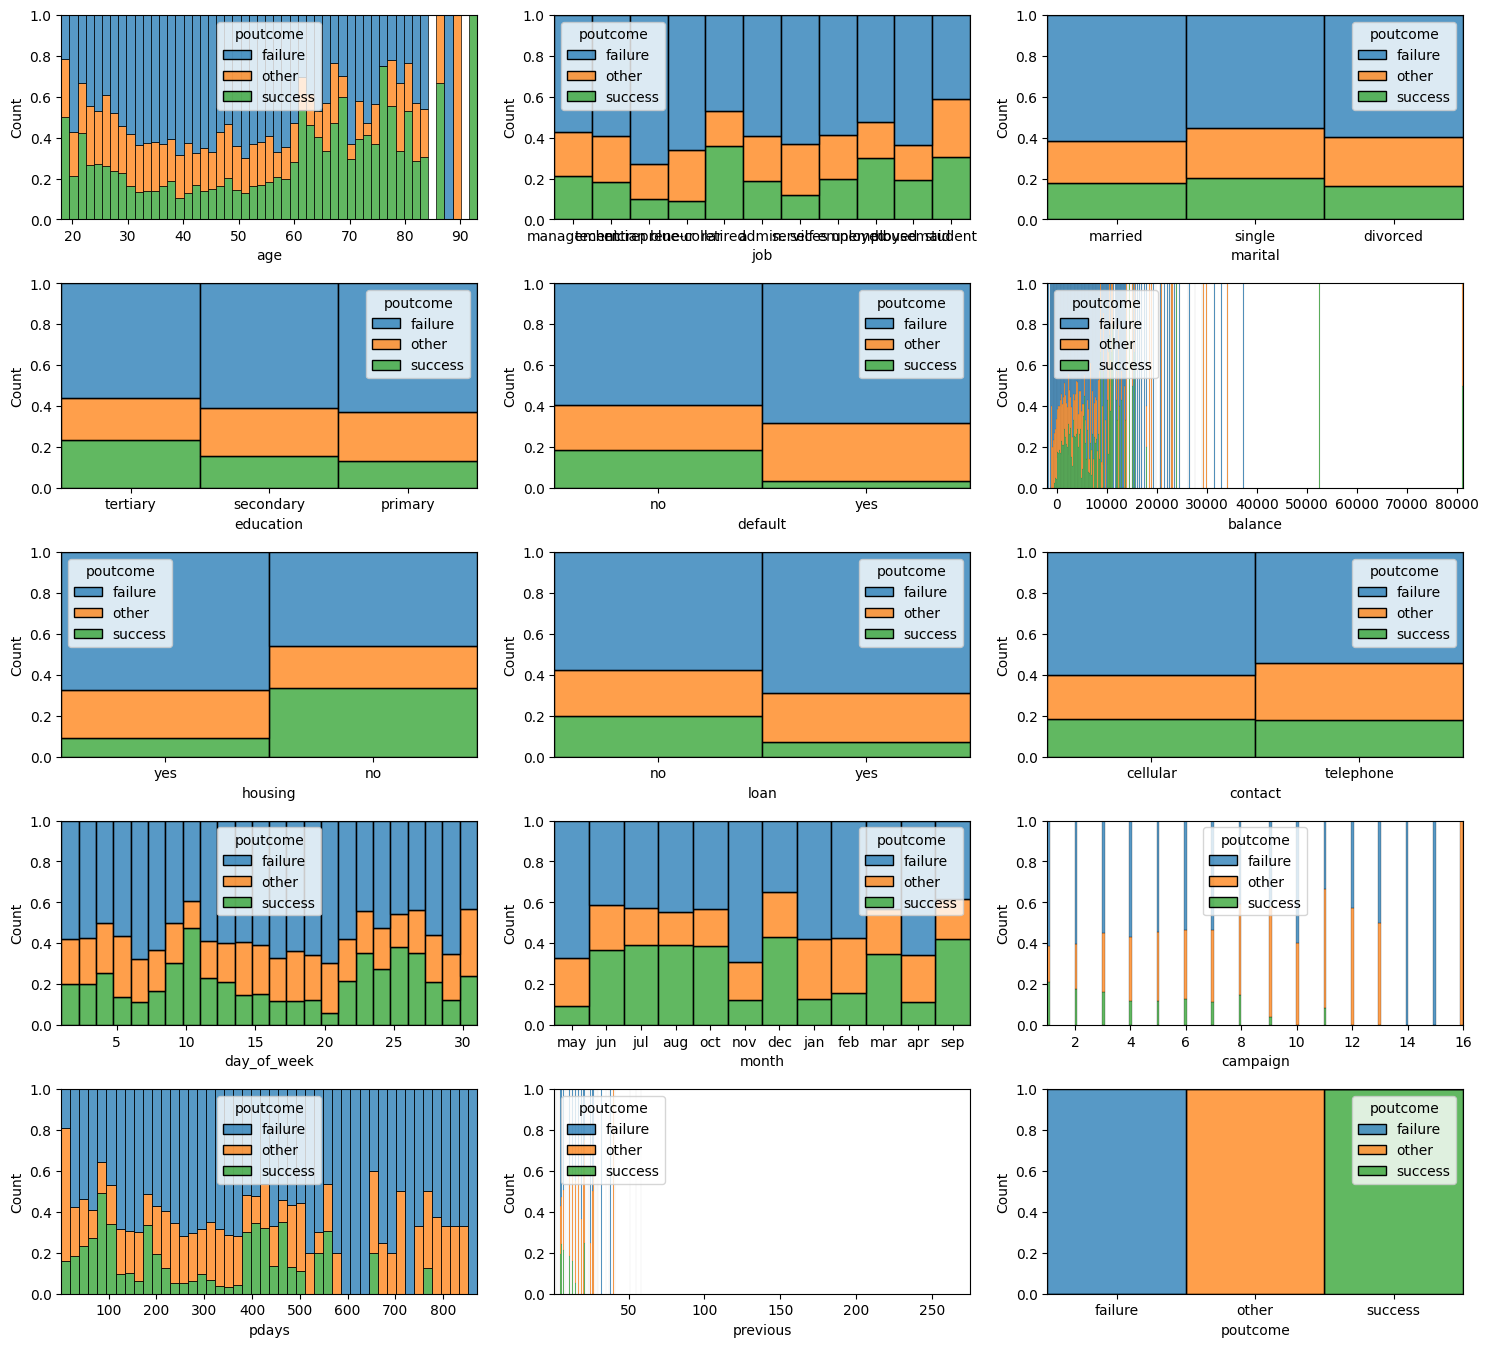

In [ ]:
plt.figure(figsize=(15, 40))
for i, col in enumerate(X.columns):
  plt.subplot(15, 3, i+1)
  sns.histplot(data=X, x=col, hue="poutcome", multiple="fill")
plt.tight_layout()
plt.show()

Podobna sytuacja zachodzi podczas analizy zależności `contact` od innych zmiennych. Ponownie `age` wykazuje największy wpływ.

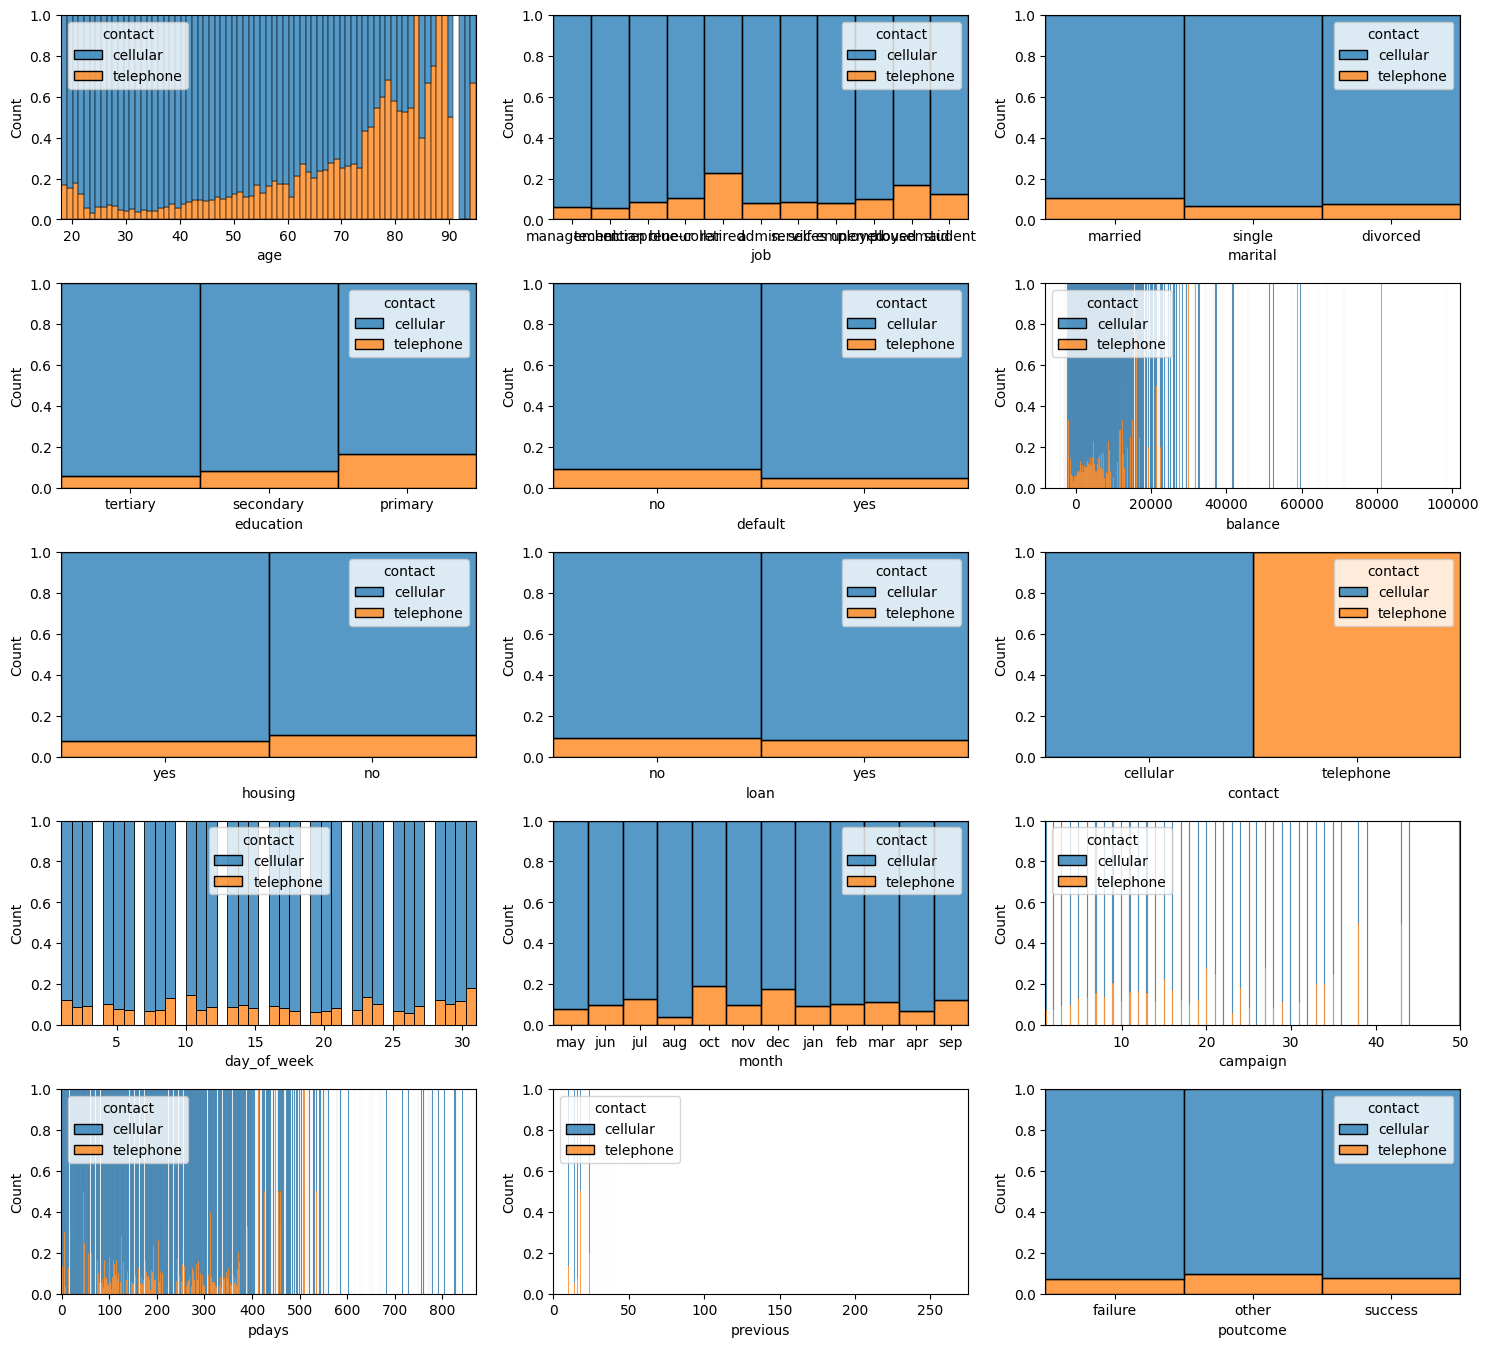

In [ ]:
plt.figure(figsize=(15, 40))
for i, col in enumerate(X.columns):
  plt.subplot(15, 3, i+1)
  sns.histplot(data=X, x=col, hue="contact", multiple="fill")
plt.tight_layout()
plt.show()

Pozostałe zmienne z wartościami NaN (`job` oraz `education`) uzupełnię ich własnym rozkładem ze względu na niski procent NaNow.

Sprawdzenie czy faktycznie wszystkie zmienne stanowią cenną informację w predykcji zmiennej decyzyjnej.

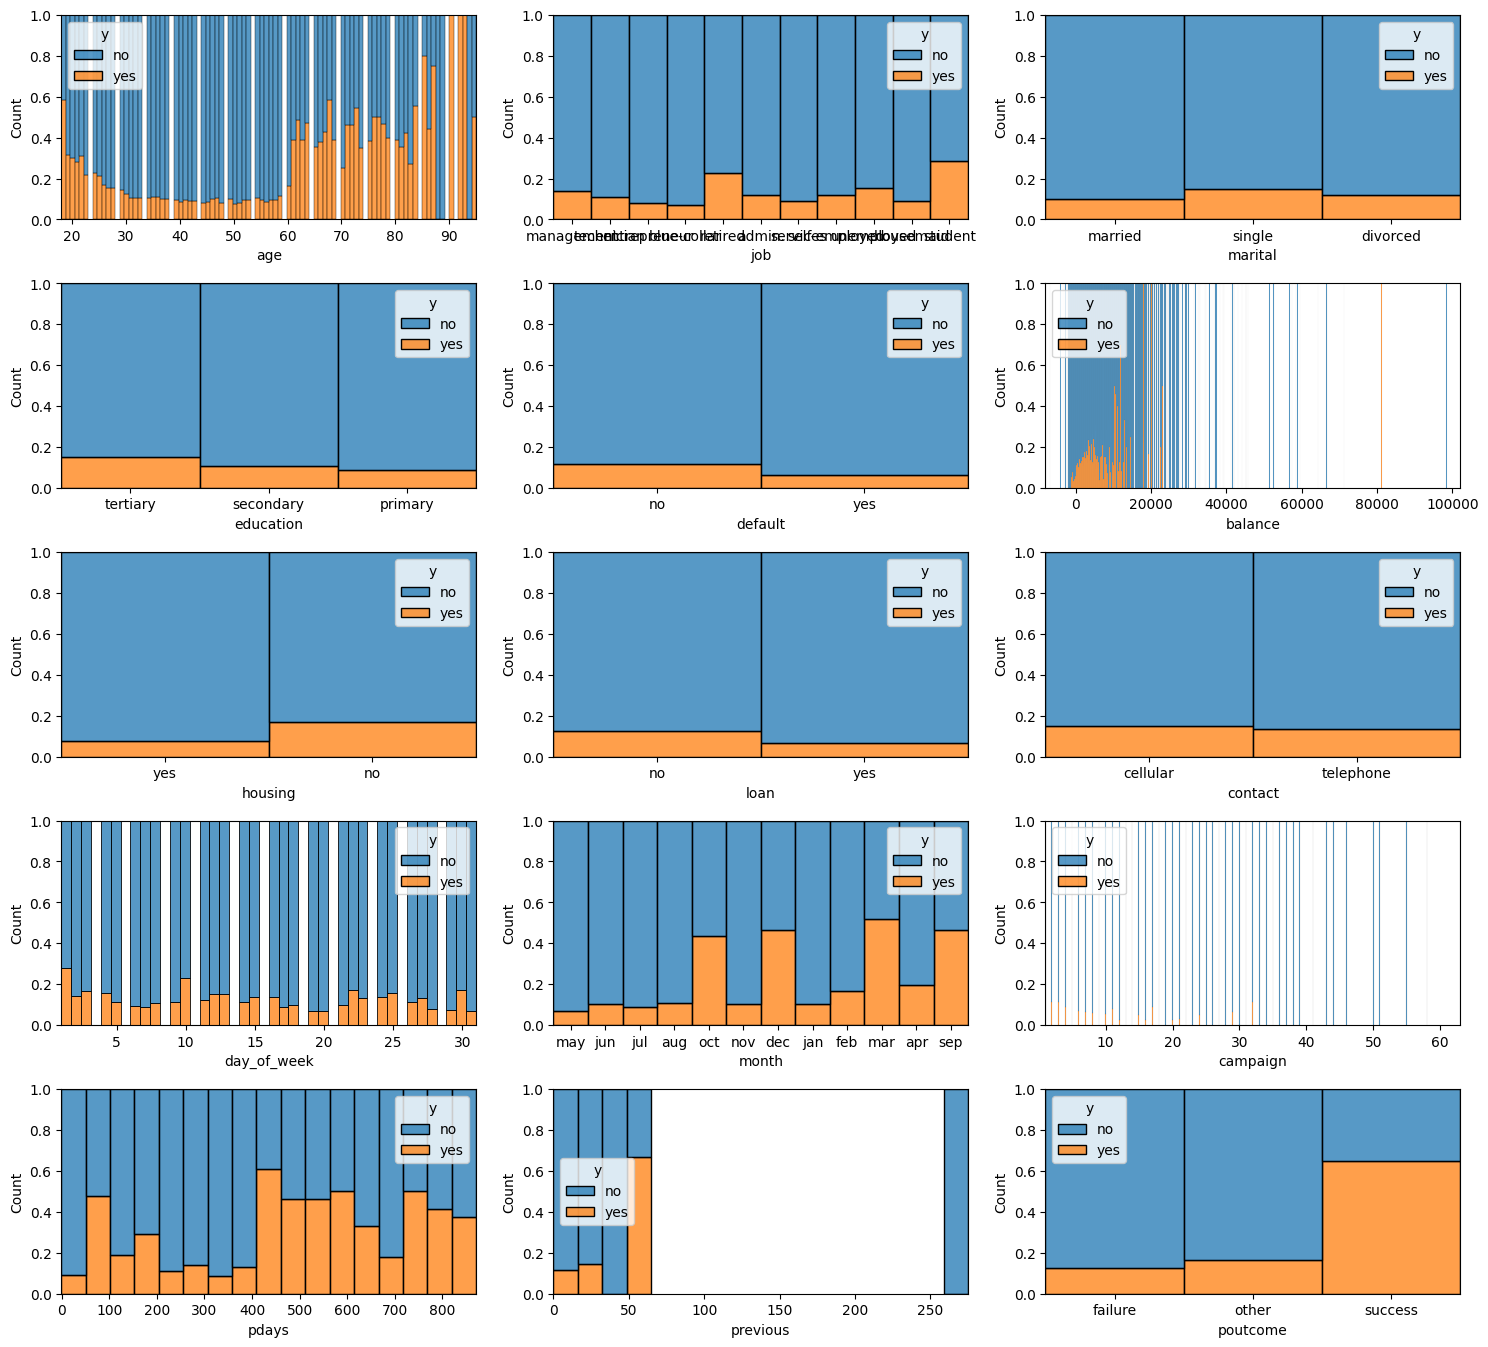

In [ ]:
plt.figure(figsize=(15, 40))
for i, col in enumerate(X.columns):
  plt.subplot(15, 3, i+1)
  sns.histplot(data=X, x=col, hue=y['y'], multiple="fill")
plt.tight_layout()
plt.show()

Wartość zmiennej `contact` sama w sobie ma znikomy wpływ na zmienną decyzyjną, a jednocześnie jest silnie powiązana z wiekiem, który ma większy wpływ na zmienną decyzyjną, stąd usunę zmienną `contact`. Dodatkowo usunę również zmienną `day_of_week`, jako że istnieje aż 14 cech, a wydaje się mieć mniejszy wpływ na zmienną decyzyjną niż `month`.

In [ ]:
X = X.drop(columns=['contact', 'day_of_week'])
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

Sprawdzenie outlierow. We wszystkich przypadakch występują liczne outliery. Spróbuję skorygować te dane.

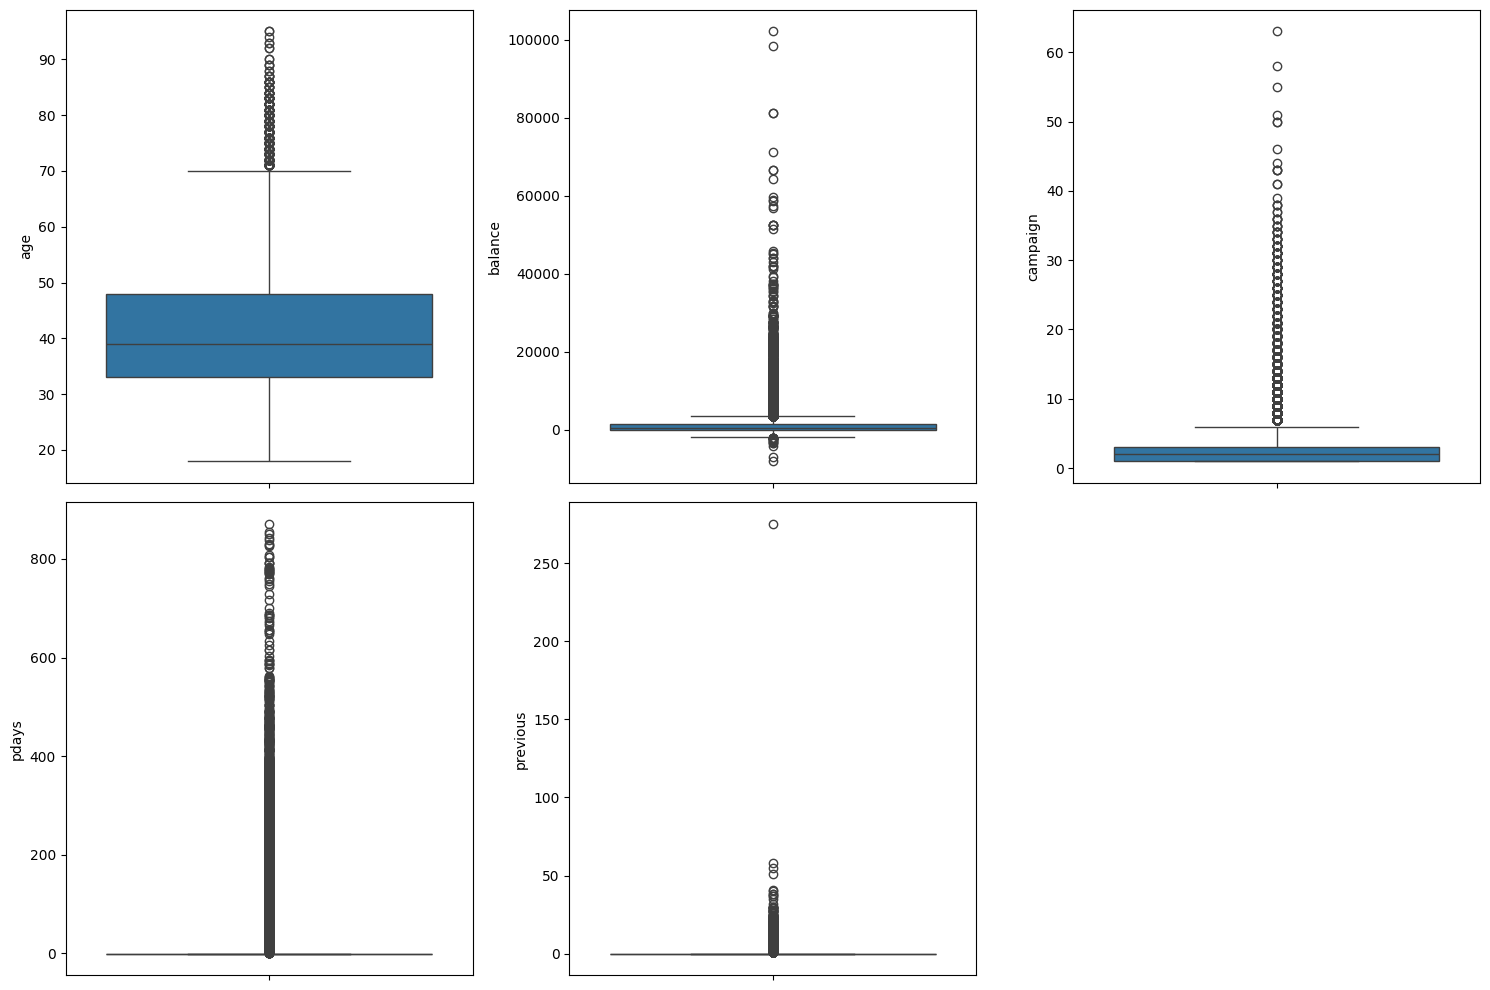

In [ ]:
plt.figure(figsize=(15, 10))
fig_num = 1
for i, col in enumerate(X.columns):
  if X[col].dtype != np.int64:
    continue
  plt.subplot(2, 3, fig_num)
  fig_num+=1
  sns.boxplot(data=X[col])
plt.tight_layout()
plt.show()

Dla `previous` występuje jedna wartość bardzo odstająca od reszty. Usunę ją w celu uproszczenia modelu (uniknięcia overfittingu).

In [ ]:
print(X.shape[0])
rows_to_drop = X[X['previous'] > 100].index
X = X.drop(rows_to_drop)
y = y.drop(rows_to_drop)
print(X.shape[0])

45211
45210


W przypadku `pdays` zauważyć można spore niezrównoważenie danych. Zanim zmodyfikuję tę zmienną, przyjrzę się rozkładowi danych tej oraz pozostałych zmiennych numerycznych.

In [ ]:
X['pdays'].value_counts()

,count
pdays,
-1,36954
182,167
92,147
183,126
91,126
...,...
749,1
769,1
587,1


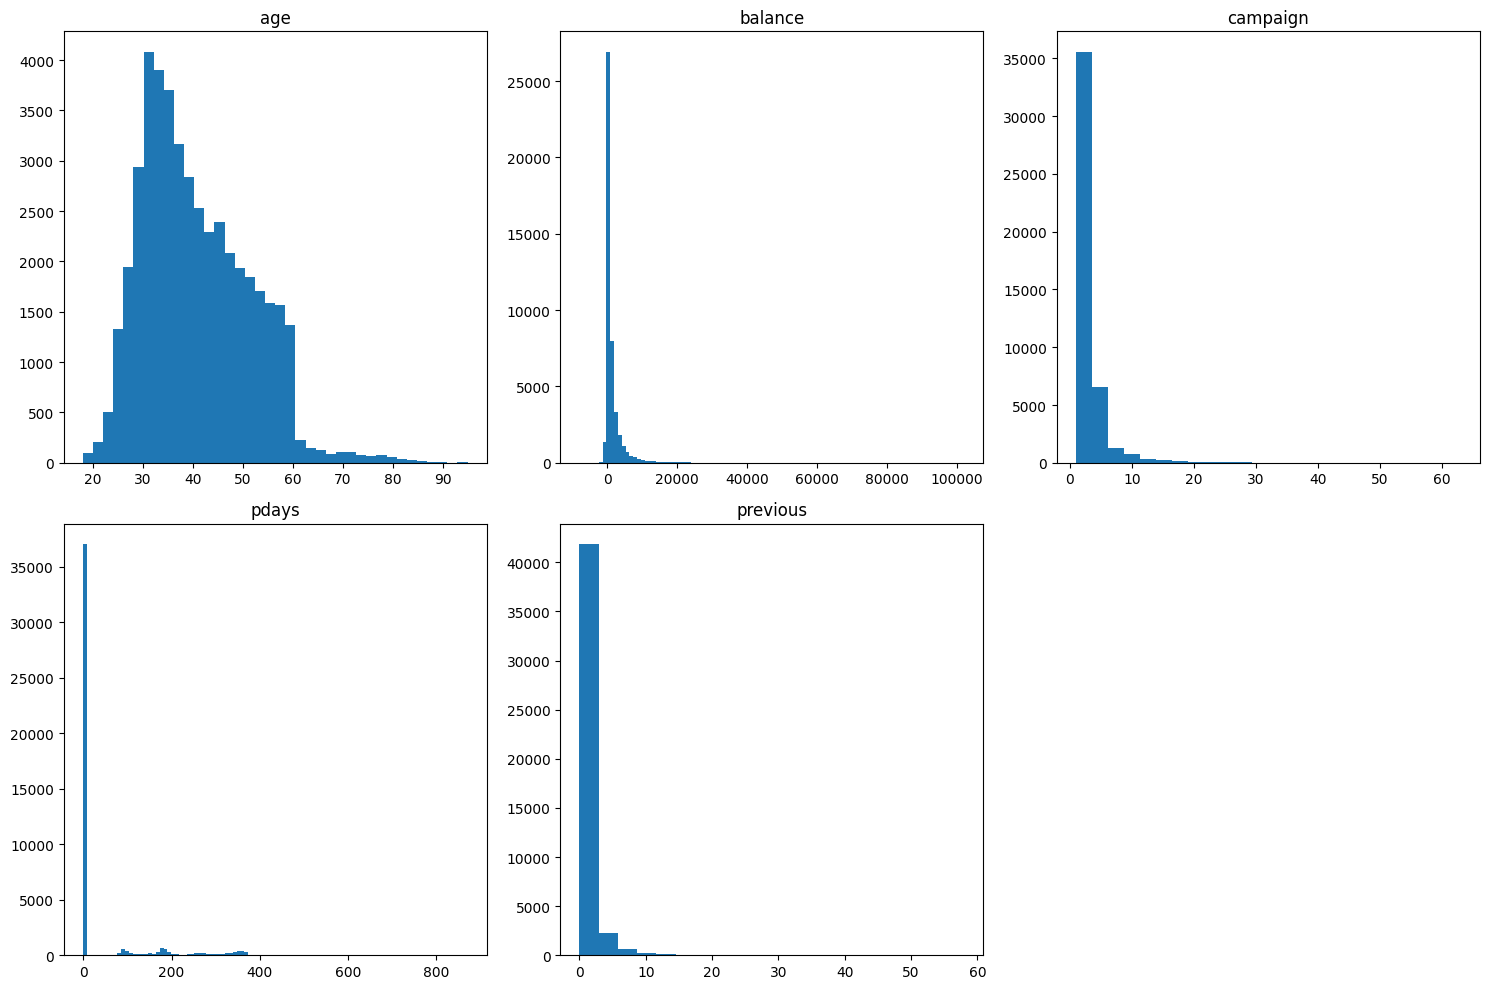

In [ ]:
plt.figure(figsize=(15, 10))
fig_num = 1
for i, col in enumerate(X.columns):
  if X[col].dtype != np.int64:
    continue
  plt.subplot(2, 3, fig_num)
  fig_num+=1
  plt.title(col)
  plt.hist(X[col], bins=min(100, len(X[col].unique())//2))
plt.tight_layout()
plt.show()

Większość rozkładów jest przechylonych w lewo, stąd liczne outliery w boxplotach przedstawionych wcześniej. Tak jak można zauważyć niżej na przykładzie `previous` i `balance` większość wartości jest bliska minimum...

In [ ]:
X['previous'].value_counts()

,count
previous,
0,36954
1,2772
2,2106
3,1142
4,714
5,459
6,277
7,205
8,129


In [ ]:
X['balance'].value_counts()

,count
balance,
0,3514
1,195
2,156
4,139
3,134
...,...
14204,1
8205,1
9710,1


W przypadku `previous` zauważyć można, że jest mocno powiązana z `pdays` (-1 w `pdays` znajduje się w takiej samej liczbie wierszy co 0 w `previous`). Zmienną `previous` zmienię na binarną w celu wyrównania rozkładu, jako że spośród 40 dostępnych kategorii większość wierszy znajduje się tylko w jednej z nich. Przy okazji usunę zmienną `pdays`, żeby nie powtarzać się z podobną cechą.

In [ ]:
X.loc[X['previous'] != 0, 'previous'] = 1
X = X.drop(columns=['pdays'])
print(X['previous'].value_counts())

previous
0    36954
1     8256
Name: count, dtype: int64


Dla `balance` stworzę kilka kategorii o podobnej liczności.

In [ ]:
bins = [-float('inf'), -1, 249, 999, float('inf')]
labels = ['negative', '0-249', '250-999', 'over_1k']
X['balance_category'] = pd.cut(X['balance'], bins=bins, labels=labels)
X = X.drop(columns=['balance'])
print(X['balance_category'].value_counts())

balance_category
over_1k     14642
0-249       13658
250-999     13144
negative     3766
Name: count, dtype: int64


Podobnie dla `campaign` jako, że większość wierszy ma tą samą kategorię.

In [ ]:
bins = [-float('inf'), 1, 4, 9, float('inf')]
labels = ['1', '2-4', '5-9', '10_or_more']
X['campaign_category'] = pd.cut(X['campaign'], bins=bins, labels=labels)
X = X.drop(columns=['campaign'])
print(X['campaign_category'].value_counts())

campaign_category
2-4           21547
1             17544
5-9            4657
10_or_more     1462
Name: count, dtype: int64


Dodatkowo jeszcze zamienię zmienną `age` na kilka odmiennych kategorii zgodnie z wizualizacją, gdzie sprawdzałem rozkład `y` w porównaniu do każdej ze zmiennych (Na podstawie wizualizacji względem wieku można było wyróżnić następujące przedziały \<30 lat spadek, 30-60 minimum, 60+ płaskowyż)

In [ ]:
bins = [0, 30, 60, X['age'].max()]
labels = ['young', 'middle_aged', 'senior']
X['age_category'] = pd.cut(X['age'], bins=bins, labels=labels)
X = X.drop(columns=['age'])
print(X['age_category'].value_counts())

age_category
middle_aged    36992
young           7030
senior          1188
Name: count, dtype: int64


Na koniec sprawdzenie liczebności kategorii dla wszystkich zmiennych przed przystąpieniem do kodowania.

In [ ]:
for col in X.columns:
  print(X[col].value_counts(), f"\n{"-" * 80}")

job
blue-collar      9732
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64 
--------------------------------------------------------------------------------
marital
married     27213
single      12790
divorced     5207
Name: count, dtype: int64 
--------------------------------------------------------------------------------
education
secondary    23202
tertiary     13300
primary       6851
Name: count, dtype: int64 
--------------------------------------------------------------------------------
default
no     44395
yes      815
Name: count, dtype: int64 
--------------------------------------------------------------------------------
housing
yes    25129
no     20081
Name: count, dtype: int64 
--------------------------------------------------------------------------------
loan
no     37966

# Podział na zbiory treningowe, walidacyjne i testowe - Uzupełnienie NaN oraz kodowanie zbioru

Podział zbioru na treningowy - testowy w proporcji 0.8 - 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # random state dla powtarzalności wyniku

In [ ]:
X['poutcome'].value_counts()

,count
poutcome,
failure,4901
other,1839
success,1511


Uzupełnianie `job` oraz `education` ich własnym rozkładem

In [ ]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [ ]:
def fill_nans(column):
  distribution = get_column_distribution(X_train, column)
  vals = distribution.index
  probs = distribution.values
  missing_in_train = X_train[column].isna()
  missing_in_test = X_test[column].isna()
  X_train.loc[missing_in_train, column] = np.random.choice(vals, size=missing_in_train.sum(), p=probs)
  X_test.loc[missing_in_test, column] = np.random.choice(vals, size=missing_in_test.sum(), p=probs)

In [ ]:
fill_nans('job')
fill_nans('education')

Uzupełnianie `poutcome` w oparciu o rozkład `age_category`.

In [ ]:
poutcome_conditional_distribution = X_train.groupby('age_category', observed=False)['poutcome'].value_counts(normalize=True).unstack(fill_value=0)
print("Rozkład 'poutcome' w zalezności od 'age_category':\n", poutcome_conditional_distribution)

Rozkład 'poutcome' w zalezności od 'age_category':
 poutcome       failure     other   success
age_category                              
young         0.502947  0.284872  0.212181
middle_aged   0.631427  0.212586  0.155986
senior        0.363095  0.172619  0.464286


In [ ]:
def impute_poutcome_conditional(X_df, conditional_dist):
  df = X_df.copy()
  age_for_poutcome_nan = df.loc[df['poutcome'].isna(), 'age_category']
  imputed_values_series = pd.Series(index=age_for_poutcome_nan.index, dtype=object)

  for age_cat in age_for_poutcome_nan.unique():
    # indeksy wierszy z NaN w poutcome oraz wybraną kategorią w 'age_category'
    indices_to_impute = age_for_poutcome_nan[age_for_poutcome_nan == age_cat].index
    # rozkład prawdopodobieństwa dla wybranej kategorii wiekowej
    probabilities = conditional_dist.loc[age_cat]
    if probabilities.sum() > 0:
      # losowanie wartości
      sampled_values = np.random.choice(probabilities.index, size=len(indices_to_impute), p=probabilities.values)
      imputed_values_series.loc[indices_to_impute] = sampled_values
  df.loc[df['poutcome'].isna(), 'poutcome'] = imputed_values_series
  return df

X_train = impute_poutcome_conditional(X_train, poutcome_conditional_distribution)
X_test = impute_poutcome_conditional(X_test, poutcome_conditional_distribution)

print("Brakujące wartości w 'poutcome':")
print(f"X_train: {X_train['poutcome'].isna().sum()}")
print(f"X_test: {X_test['poutcome'].isna().sum()}")

Brakujące wartości w 'poutcome':
X_train: 0
X_test: 0


Weryfikacja braku Nanów.

In [ ]:
def check_nans(df):
  print(df.isna().sum(axis=0)/X.shape[0]*100)

check_nans(X_train)
check_nans(X_test)

job                  0.0
marital              0.0
education            0.0
default              0.0
housing              0.0
loan                 0.0
month                0.0
previous             0.0
poutcome             0.0
balance_category     0.0
campaign_category    0.0
age_category         0.0
dtype: float64
job                  0.0
marital              0.0
education            0.0
default              0.0
housing              0.0
loan                 0.0
month                0.0
previous             0.0
poutcome             0.0
balance_category     0.0
campaign_category    0.0
age_category         0.0
dtype: float64


Teraz można przejść do kodowania. Poniżej zliczyłem kategorie występujące dla każdej zmiennej. Dla zmiennych `job`, `marital` oraz `poutcome` zastosuję one-hot-encoding, a dla pozostałych numerację 0, 1 itd.

In [ ]:
for col in X_train.columns:
  print(col, len(X_train[col].unique()))

job 11
marital 3
education 3
default 2
housing 2
loan 2
month 12
previous 2
poutcome 3
balance_category 4
campaign_category 4
age_category 3


In [ ]:
import numpy as np
import pandas as pd

one_hot_cols = ['job', 'marital', 'poutcome']
binary_map_cols = ['default', 'housing', 'loan']

for col in one_hot_cols: # one-hot encoding
  X_train = pd.get_dummies(data=X_train, prefix=col, columns=[col], dtype=np.int64)
  X_test = pd.get_dummies(data=X_test, prefix=col, columns=[col], dtype=np.int64)

for col in X_train.columns.copy():
  if col in binary_map_cols: # kodowanie dla zmiennych binarnych
    if col in X_train.columns and len(X_train[col].unique()) == 2:
      X_train[col] = X_train[col].map({'yes': 1, 'no': 0})
      X_test[col] = X_test[col].map({'yes': 1, 'no': 0})
  else:
    # kodowanie pozostałych zmiennych
    if col == 'education':
      mapping = {'primary': 0, 'secondary': 1, 'tertiary': 2}
    elif col == 'month':
      mapping = {
          'jan': 0, 'feb': 1, 'mar': 2,
          'apr': 3, 'may': 4, 'jun': 5,
          'jul': 6, 'aug': 7, 'sep': 8,
          'oct': 9, 'nov': 10, 'dec': 11
      }
    elif col == 'age_category':
      mapping = {
          'young': 0,
          'middle_aged': 1,
          'senior': 2
      }
    elif col == 'balance_category':
      mapping = {
          'negative': 0,
          '0-249': 1,
          '250-999': 2,
          'over_1k': 3
      }
    elif col == 'campaign_category':
      mapping = {
          '1': 0,
          '2-4': 1,
          '5-9': 2,
          '10_or_more': 3
      }
    else:
      continue # uniknięcie zakodowania jednej z już zakodowanych wcześniej kolumn
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)


Zakodowanie zmiennej decyzyjnej.

In [ ]:
y_train = y_train['y'].map({'yes': 1, 'no': 0})
y_test = y_test['y'].map({'yes': 1, 'no': 0})

Widok zakodowanych danych.

In [ ]:
X_train.head()

,education,default,housing,loan,month,previous,balance_category,campaign_category,age_category,job_admin.,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success
33796,2,0,0,0,3,0,2,0,1,0,...,0,0,0,0,0,0,1,0,0,1
22468,2,0,0,0,7,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
6896,1,0,1,0,4,0,2,0,1,1,...,0,0,0,0,0,0,1,1,0,0
28408,0,0,1,0,0,1,2,0,1,0,...,0,0,0,0,0,1,0,1,0,0
8481,1,0,1,0,5,0,1,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
X_train.isna().sum(axis=0)

,0
education,0
default,0
housing,0
loan,0
month,0
previous,0
balance_category,0
campaign_category,0
age_category,0
job_admin.,0


Przeprowadzone kodowanie zakończyło się sukcesem na co wskazuje brak NaNów. Całościowo, proces EDA był u mnie trochę chaotyczny, gdyż w trakcie jej realizacji zauważyłem choćby, że niektóre kolumny zawierają bardzo podobne informacje, więc część zmiennych można było usunąć dla lepszego treningu modelu. Dodatkowo, doszedłem do wniosku, że znaczną część zmiennych trzeba było pogrupować np. wiek, balance itp., ze względu na znaczące niezrównoważenie kategorii dla tych zmiennych.
<br><br>
Nie jestem pewien tylko tego czy model zadziała dobrze na to jak zakodowałem miesiące, gdyż kod sięga aż do 11, lecz na ten moment uważam, że jest to lepsze podejście niż one-hot, które znacząco zwiększyłoby liczbę wymiarów danych, a wymiarów jest już sporo przez `job`.

# Modelowanie
Do etapu tworzenia modeli wybrałem następujące 3: regresja logistyczna, Losowy las oraz SVC. Modele te zostały zdefiniowane poniżej.

In [ ]:
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import shap

In [ ]:
logreg_model = linear_model.LogisticRegression(
    random_state=42 # random state dla powtarzalności eksperymentu
)

In [ ]:
svc_model = SVC(
    random_state=42
)

In [ ]:
forest_model = RandomForestClassifier(
    random_state=42
)

Jak można zauważyć poniżej, w pobranym na początku datasecie liczba zer ('no') jest aż 8-krotnie większa od liczby jedynek ('yes'). Z tego powodu metryka accuracy nie będzie przydatna w analizie skuteczności modelu. Zdecydowanie bardziej przydatne będą precision, recall, lub f1. Na ten moment traktuję precision jako najbardziej istotną metrykę. Pozwala ona ocenić ile predykcji '1' faktycznie okazało się '1'. Wysoka wartość precision oznacza wtedy, że model jest skupiony na identyfikacji osób bardziej skłonnych do założenia lokaty terminowej, minimalizując przy tym błędne predykcje '1'.

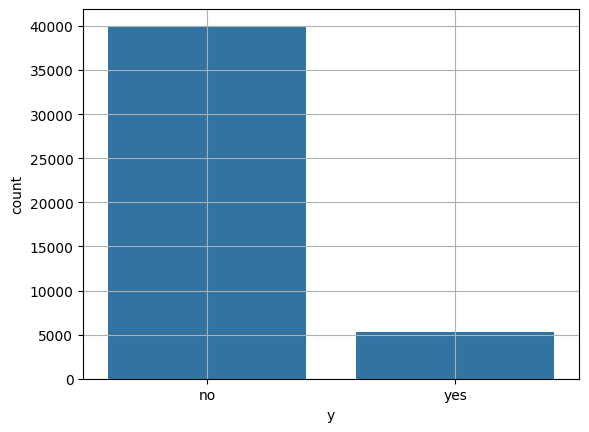

In [ ]:
sns.countplot(data=y, x='y')
plt.grid()
plt.show()

Poniżej baseline, stanowiący miernik skuteczności trenowanych później modeli. Precision dla '1' wynosi tu 0.12

In [ ]:
model = DummyClassifier(strategy = 'uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.50      0.64      8011
           1       0.12      0.51      0.19      1031

    accuracy                           0.50      9042
   macro avg       0.50      0.50      0.42      9042
weighted avg       0.80      0.50      0.59      9042



Funkcja do trenowania modelu i zwrócenia rozwiązania wraz z najlepszym modelem oraz przygotowanie ramki dla tabeli do porównania wyników. GridSearchCV dokonuje cross-walidacji na zbiorze walidacyjnym zgodnie z poleceniem. W poniższej funkcji zbiór walidacyjny stanowi 1/5 zbioru treningowego (cv=5).

In [ ]:
table = pd.DataFrame(index=['logreg', 'forest', 'svc'], columns=['precision', 'recall', 'f1', 'accuracy'])

def grid_search_function(model, params):
  grid_search = GridSearchCV(model, params, cv=5, scoring='precision', n_jobs=-1)
  grid_search.fit(X_train, y_train)
  grid_res = pd.DataFrame.from_dict(grid_search.cv_results_).drop(columns=['params'])
  grid_res = grid_res.drop(columns=[col for col in grid_res.columns if col.find('_time') != -1 or col.find('split') != -1 or col.find('std_') != -1])
  return grid_res, grid_search.best_estimator_

Trening LogisticRegression

In [ ]:
param_grid = {'class_weight' : [None, 'balanced'],
              'C' : [0.1, 1, 10],
              'max_iter' : [500]}
logreg_results, best_logreg = grid_search_function(logreg_model, param_grid)
print(best_logreg)
logreg_results

LogisticRegression(C=0.1, max_iter=500, random_state=42)


,param_C,param_class_weight,param_max_iter,mean_test_score,rank_test_score
0,0.1,None,500,0.691790,1
1,0.1,balanced,500,0.213980,4
2,1.0,None,500,0.672438,2
3,1.0,balanced,500,0.213877,5
4,10.0,None,500,0.668186,3
5,10.0,balanced,500,0.213800,6


In [ ]:
y_pred = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred))
d = classification_report(y_test, y_pred, output_dict=True)
table.loc['logreg'] = [d['1']['precision'], d['1']['recall'], d['1']['f1-score'], d['accuracy']]

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8011
           1       0.66      0.08      0.14      1031

    accuracy                           0.89      9042
   macro avg       0.78      0.54      0.54      9042
weighted avg       0.87      0.89      0.85      9042



Trening RandomForest.

In [ ]:
param_grid_tree = {'n_estimators' : [25, 50, 75],
                   'max_depth' : [8, 10, 12],
                   'class_weight' : [None, 'balanced']}
forest_results, best_forest = grid_search_function(forest_model, param_grid_tree)
print(best_forest)
forest_results

RandomForestClassifier(max_depth=8, n_estimators=75, random_state=42)


,param_class_weight,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
0,None,8,25,0.688700,3
1,None,8,50,0.692257,2
2,None,8,75,0.694368,1
3,None,10,25,0.672126,4
4,None,10,50,0.669127,5
5,None,10,75,0.667441,6
6,None,12,25,0.631739,9
7,None,12,50,0.640104,8
8,None,12,75,0.649466,7
9,balanced,8,25,0.308374,18


In [ ]:
y_pred = best_forest.predict(X_test)
print(classification_report(y_test, y_pred))
d = classification_report(y_test, y_pred, output_dict=True)
table.loc['forest'] = [d['1']['precision'], d['1']['recall'], d['1']['f1-score'], d['accuracy']]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8011
           1       0.70      0.17      0.27      1031

    accuracy                           0.90      9042
   macro avg       0.80      0.58      0.61      9042
weighted avg       0.88      0.90      0.87      9042



Trening SVC.

In [ ]:
param_grid_svc = {'class_weight' : [None, 'balanced'],
                  'C' : [0.1, 10, 100]}
svc_results, best_svc = grid_search_function(svc_model, param_grid_svc)
print(best_svc)
svc_results

SVC(C=10, random_state=42)


,param_C,param_class_weight,mean_test_score,rank_test_score
0,0.1,None,0.000000,6
1,0.1,balanced,0.256415,5
2,10.0,None,0.647119,1
3,10.0,balanced,0.310842,3
4,100.0,None,0.646508,2
5,100.0,balanced,0.289692,4


In [ ]:
y_pred = best_svc.predict(X_test)
print(classification_report(y_test, y_pred))
d = classification_report(y_test, y_pred, output_dict=True)
table.loc['svc'] = [d['1']['precision'], d['1']['recall'], d['1']['f1-score'], d['accuracy']]

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      8011
           1       0.65      0.21      0.31      1031

    accuracy                           0.90      9042
   macro avg       0.78      0.60      0.63      9042
weighted avg       0.88      0.90      0.87      9042



Porównanie wyników najlepszych modeli.
<br>
Wszystkie zastosowane modele uzyskały podobną wartość `precision` (w przedziale 64 - 70%). Jest to wartość zdecydowanie większa niż dla baseline, lecz odbywa się to kosztem niskiego `recall`. Regresja logistyczna najgorzej radziła sobie z niezbalansowanym rozkładem `y` trafiając zaledwie 7.6% wszystkich '1', osiągając przy tym wynik `f1` poniżej baseline'u xd. Pozostałe modele radziły sobie nieco lepiej, co widać po wyższej wartości `recall`, ale raczej nie jest to wynik zadowalający.

In [ ]:
table = table.astype(float).round(3)
table

,precision,recall,f1,accuracy
logreg,0.661,0.076,0.136,0.890
forest,0.696,0.167,0.269,0.897
svc,0.648,0.206,0.312,0.897


# SHAP

Zastosowanie SHAP do wyjaśnialności modelu na przykładzie modelu `best_forest`.

In [ ]:
# predykcje
pred = best_forest.predict(X_test)

# indeksy poprawnych przykładów
correct_idx_0 = np.where((pred == y_test) & (pred == 0))[0][0] # poprawna predykcja 0
correct_idx_1 = np.where((pred == y_test) & (pred == 1))[0][0] # poprawna predykcja 1

# indeksy błędnych przykładów
wrong_idx_0 = np.where((pred != y_test) & (pred == 0))[0][0] # predykcja - 0 ; rzeczywista wartość - 1
wrong_idx_1 = np.where((pred != y_test) & (pred == 1))[0][0] # predykcja - 1 ; rzeczywista wartość - 0


In [ ]:
# explainer
explainer = shap.TreeExplainer(best_forest)
shap_values = explainer.shap_values(X_test)
shap.Explainer

shap.explainers._explainer.Explainer

Wizualizacja dla poprawnej oraz błędnej predykcji '0'.

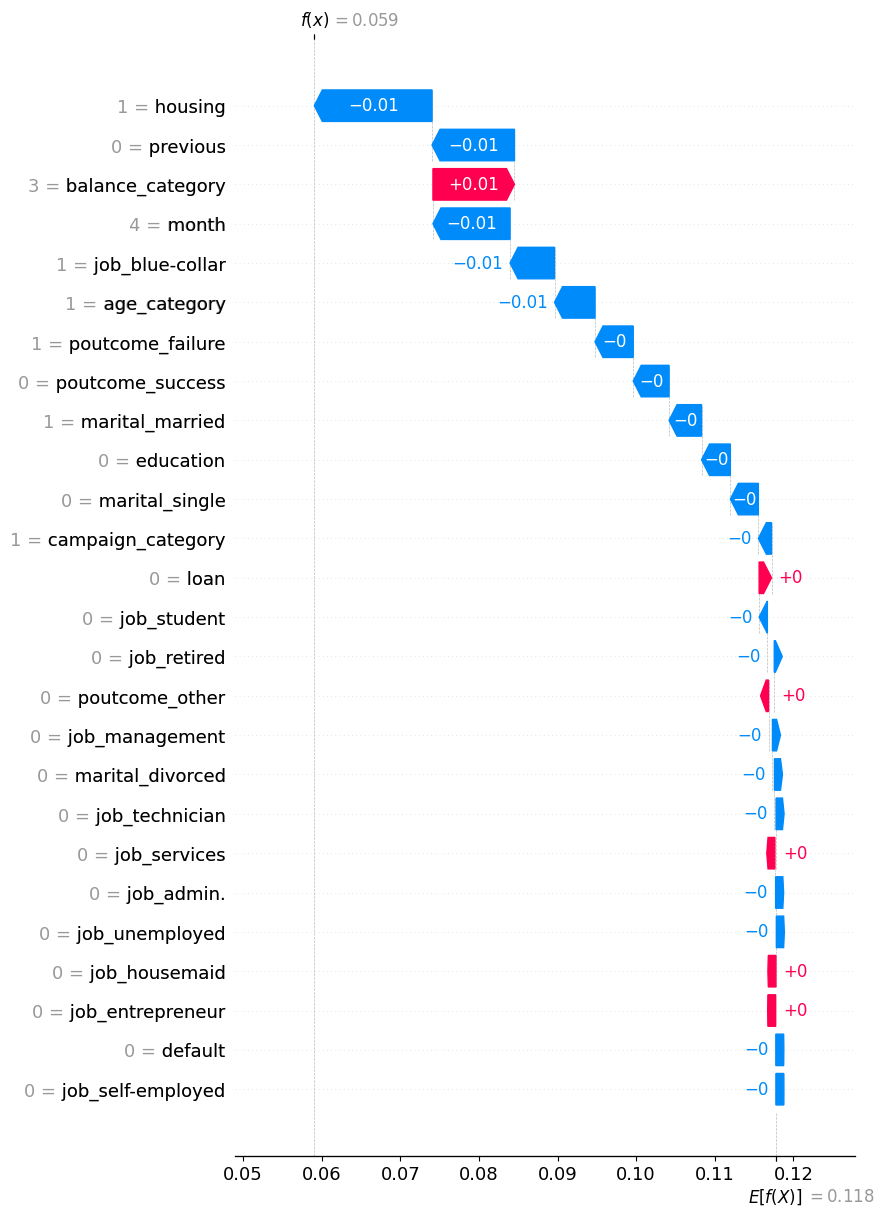

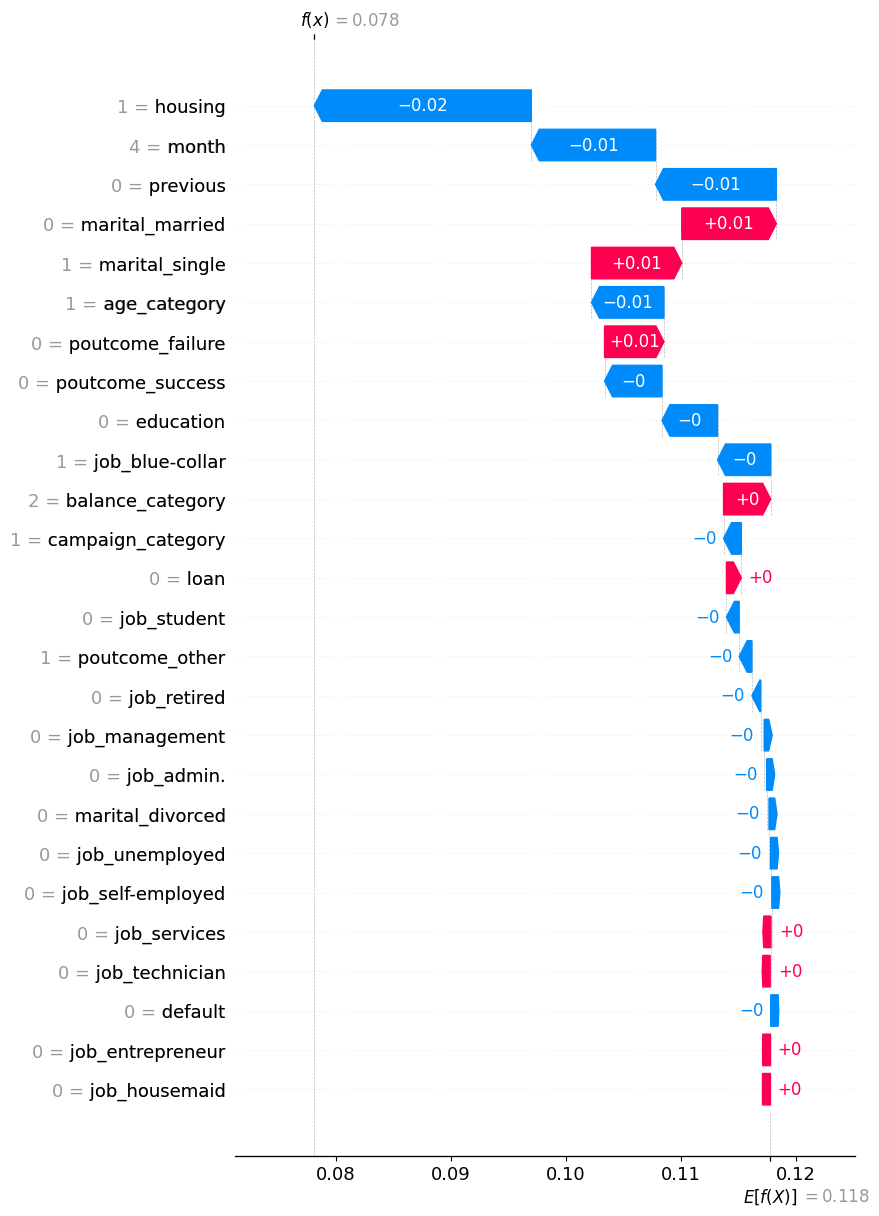

In [ ]:
n_features = X_test.shape[1] # wymuszenie wyświetlenia wszystkich cech
# przykład dla poprawnej predykcji
shap.plots.waterfall(shap.Explanation(values=shap_values[correct_idx_0][:, 1], base_values=explainer.expected_value[1], data=X_test.iloc[correct_idx_0].values, feature_names=X_test.columns.tolist()), max_display=n_features)
# przykład dla błędnej predykcji
shap.plots.waterfall(shap.Explanation(values=shap_values[wrong_idx_0][:, 1], base_values=explainer.expected_value[1], data=X_test.iloc[wrong_idx_0].values, feature_names=X_test.columns.tolist()), max_display=n_features)

Dla powyższych wizualizacji zauważyć można, że posiadanie kredytu na dom (housing: 1) najmocniej wpływało na predykcję '0', co według mojej intuicji nie jest niczym zaskakującym. Dodatkowo, początkowa wartość `E[f(X)]` odzwierciedla niezbalansowanie zmiennej `y`. Co ciekawe wartość miesiąca również okazała się istotnym czynnikiem przy predykcji '0'.

Wizualizacja dla poprawnej oraz błędnej predykcji '1'.

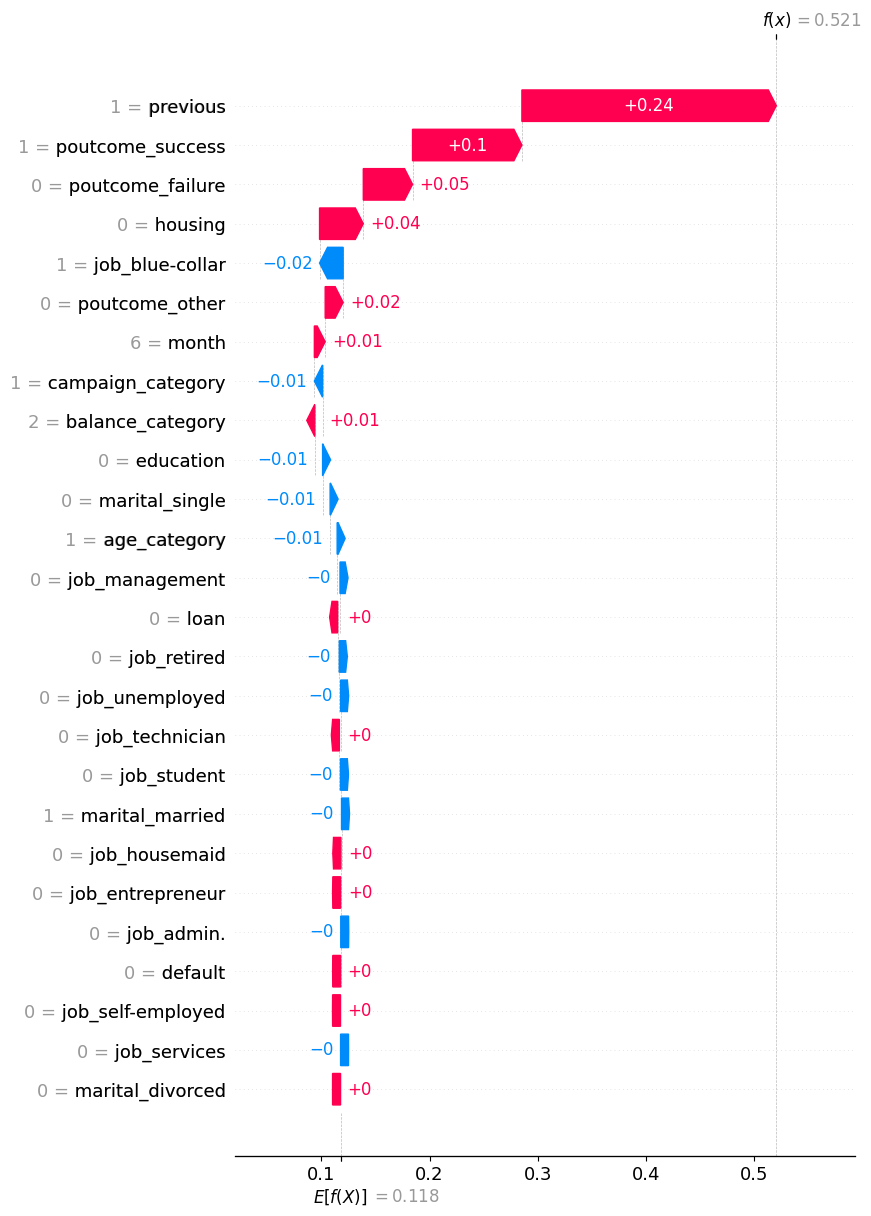

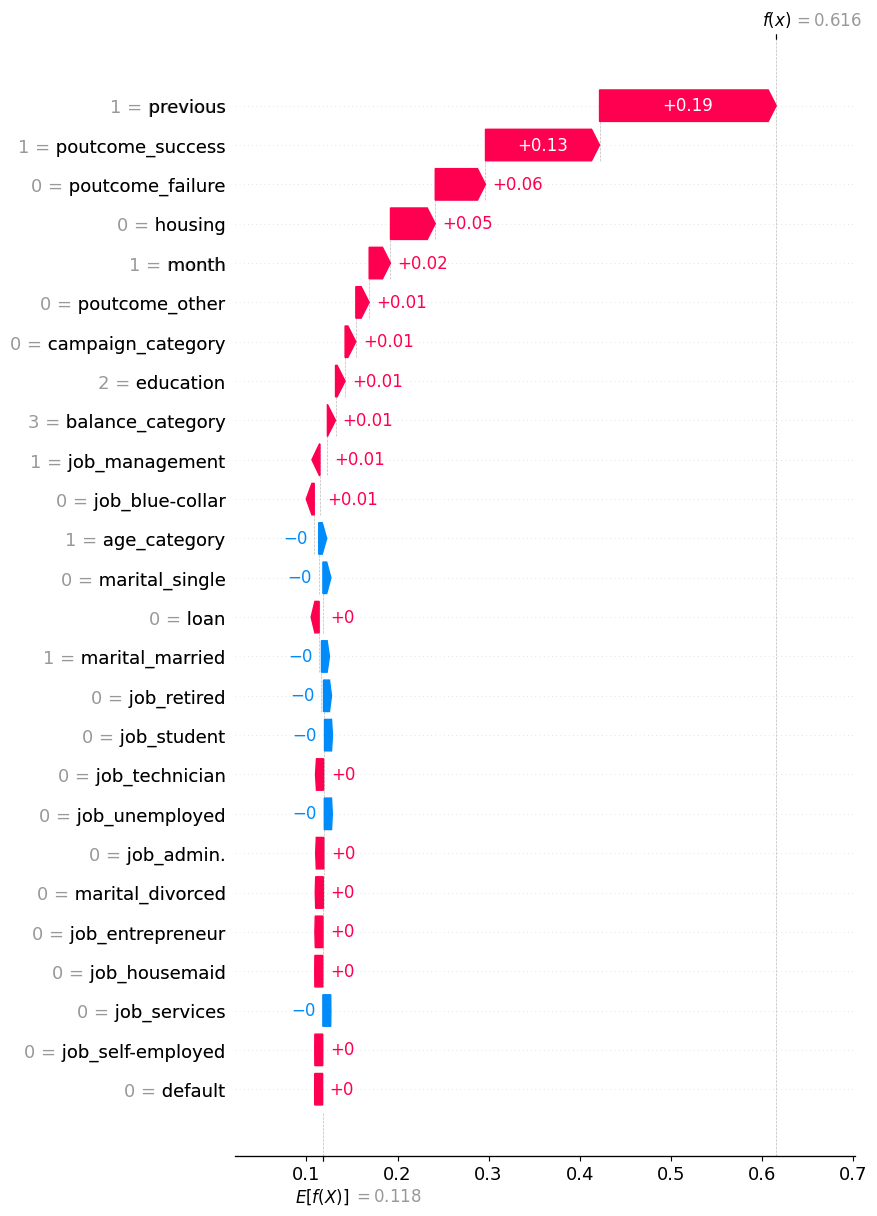

In [ ]:
n_features = X_test.shape[1] # wymuszenie wyświetlenia wszystkich cech
# przykład dla poprawnej predykcji
shap.plots.waterfall(shap.Explanation(values=shap_values[correct_idx_1][:, 1], base_values=explainer.expected_value[1], data=X_test.iloc[correct_idx_1].values, feature_names=X_test.columns.tolist()), max_display=n_features)
# przykład dla błędnej predykcji
shap.plots.waterfall(shap.Explanation(values=shap_values[wrong_idx_1][:, 1], base_values=explainer.expected_value[1], data=X_test.iloc[wrong_idx_1].values, feature_names=X_test.columns.tolist()), max_display=n_features)

Na tych wizualizacjach zarówno `previous` jak i `housing` utrzymują wysoki wpływ na wartość predykcji, podobnie jak wcześniej tylko o przeciwnym znaku. Dodatkowo, inne zmienne takie jak `default` czy `loan` okazały się mieć znikomy wpływ na wartość predykcji w każdym z 4 przedstawionych przykładów.

# Podsumowanie
Z powodu niezbalansowania datasetu regresja logistyczna najgorzej się sprawdziła w zadaniu klasyfikacji. Pozostałe modele działały lepiej, przy czym porównując wyłącznie najlepsze modele to SVC okazało się minimalnie lepsze od lasu, dzięki zastosowaniu balansu wag oraz silnej regularyzacji (parametr C), aczkolwiek bez tych parametrów (czyli bez balansownia wagami i niskim C) SVC radziło sobie porównywalnie źle, co regresja liniowa.
<br>
Dodatkowo, wyniki SHAP wskazują, że problem leży również po stronie EDA, gdyż do modelu dostarczone zostały dane z niektórymi zbędnymi zmiennymi takimi jak `loan` czy `default`, co stanowi cenną lekcję na przyszłość :)